# Scalar Fields

The scalar fields class essentially implements class for functions over some $d$-dimensional vector space $\mathbb{R}^d$.  In physics these are scalar fields, which we want to study the dynamics of.  The scalar fields class implements a large suite of useful operations including various methods for approximating derivatives and integrals, computing topological invariants, imposing a dynamics and the algebra of functions.

A scalar field $\phi(x)$ is a function over some $d$-dimensional vector space $\mathbf{X} \subseteq \mathbb{R}^d$, whose points are written as $x \in \mathbf{X}$.  For most practical purposes, it is assumed that the scalar fields we are interested in belong to the subset of smooth functions over $\mathbf{X}$, i.e. $\phi(x) \in \Phi \subseteq C^{\infty}(\mathbf{X})$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# we'll need Matrix, UGrid, and Approximator
from etraj.etraj import Vector, Matrix, UGrid, Approximator, ScalarField
import etraj.etraj as et

## Constructors

In [2]:
# Basic constructor
S = ScalarField()

# summary information
print(S)

<etraj.ScalarField ref at 0x556d97f444c0>
<ET::ScalarField<double&> object at 0x7fff7dccf598>
dim: 0, name: 'default'
  N: 0
UGrid 'default' ref at 0x556d97f44518
Approximator ref at 0x556d97f44528
Logger ref at 0x556d97f44538


In [3]:
# Constructor with a UGrid
# create a uniformly random one-dimensional grid
# between -5 and 5 with N = 10000 points.
N = 10000
x = np.random.uniform(-2*np.pi,2*np.pi,N)

# next, create the grid of microstates for this 
# set of points.
g = UGrid(x)

S = ScalarField('SField with grid',g)
print(S)

<etraj.ScalarField ref at 0x556d989c10f0>
<ET::ScalarField<double&> object at 0x7fff7dccf598>
dim: 1, name: 'SField with grid'
  N: 10000
UGrid 'default' ref at 0x556d989c1148
Approximator ref at 0x556d989c1158
Logger ref at 0x556d989c1168


In [4]:
# Constructor with UGrid and field values
f = np.cos(x)

S = ScalarField('f(x) = cos(x)',g,f)
print(S)

<etraj.ScalarField ref at 0x556d97f444c0>
<ET::ScalarField<double&> object at 0x7fff7dccf598>
dim: 1, name: 'f(x) = cos(x)'
  N: 10000
UGrid 'default' ref at 0x556d97f44518
Approximator ref at 0x556d97f44528
Logger ref at 0x556d97f44538


## Attributes for scalar fields

In [5]:
# 

## The algebra of functions

The ScalarField class comes equipped with an assortment of operator overloads.  These include the standard addition and multiplication of two fields, as well as addition and multiplication by scalars.  The following gives some examples of the use of these operators.

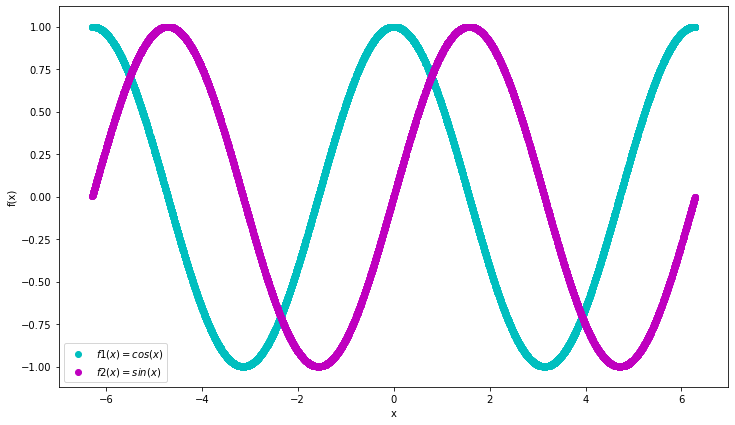

In [6]:
# Adding two scalar fields

# Two scalar fields over the same grid can be added
S1 = ScalarField('cos(x)',g,np.cos(x))
S2 = ScalarField('sin(x)',g,np.sin(x))

f1 = S1.get_field()
f2 = S2.get_field()

# Let's see what these two fields look like
fig,axs = plt.subplots(figsize=(12,7))
axs.scatter(x,f1,color='c',label=r'$f1(x)=cos(x)$')
axs.scatter(x,f2,color='m',label=r'$f2(x)=sin(x)$')
axs.set_xlabel('x')
axs.set_ylabel('f(x)')
plt.legend()
plt.show()

In [7]:
# Now let's add the two fields together
S3 = S1 + S2
print(S3)

<etraj.ScalarField ref at 0x556d98cb4920>
<ET::ScalarField<double&> object at 0x7fff7dccf598>
dim: 1, name: '(cos(x) + sin(x))'
  N: 10000
UGrid 'default' ref at 0x556d98cb4978
Approximator ref at 0x556d98cb4988
Logger ref at 0x556d98cb4998


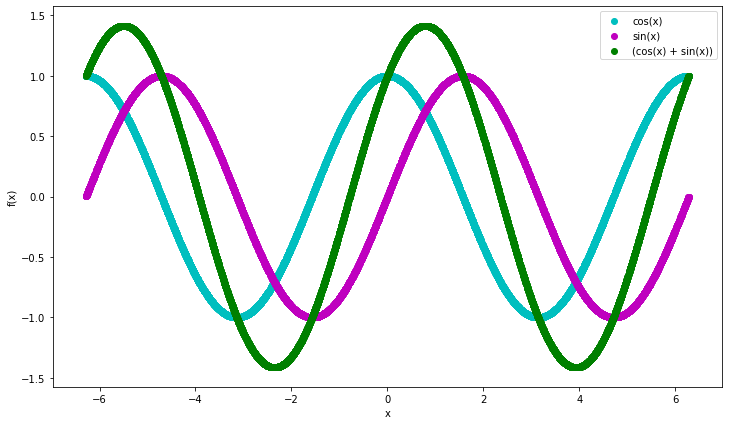

In [9]:
# The result is
f3 = S3.get_field()

fig,axs = plt.subplots(figsize=(12,7))
axs.scatter(x,f1,color='c',label=S1.get_name())
axs.scatter(x,f2,color='m',label=S2.get_name())
axs.scatter(x,f3,color='g',label=S3.get_name())
axs.set_xlabel('x')
axs.set_ylabel('f(x)')
plt.legend()
plt.show()

In [10]:
# Subtraction works in the same way
S4 = S1 - S2
print(S4)

<etraj.ScalarField ref at 0x556d98c6af40>
<ET::ScalarField<double&> object at 0x7fff7dccf598>
dim: 1, name: '(cos(x) - sin(x))'
  N: 10000
UGrid 'default' ref at 0x556d98c6af98
Approximator ref at 0x556d98c6afa8
Logger ref at 0x556d98c6afb8


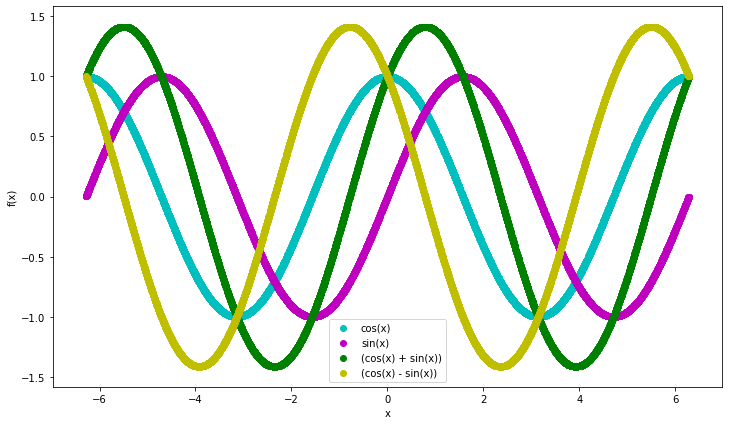

In [11]:
# The result is
f4 = S4.get_field()

fig,axs = plt.subplots(figsize=(12,7))
axs.scatter(x,f1,color='c',label=S1.get_name())
axs.scatter(x,f2,color='m',label=S2.get_name())
axs.scatter(x,f3,color='g',label=S3.get_name())
axs.scatter(x,f4,color='y',label=S4.get_name())
axs.set_xlabel('x')
axs.set_ylabel('f(x)')
plt.legend()
plt.show()

In [12]:
# We can also multiply two scalar fields
S5 = S1 * S2
print(S5)

<etraj.ScalarField ref at 0x556d98cc0550>
<ET::ScalarField<double&> object at 0x7fff7dccf598>
dim: 1, name: '(cos(x) * sin(x))'
  N: 10000
UGrid 'default' ref at 0x556d98cc05a8
Approximator ref at 0x556d98cc05b8
Logger ref at 0x556d98cc05c8


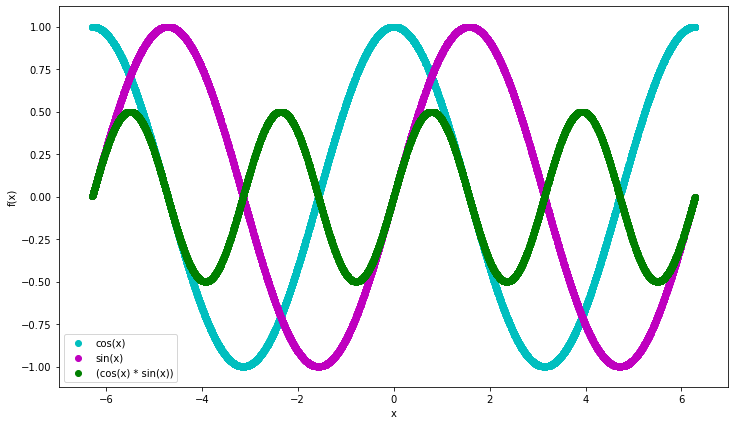

In [13]:
# The result is
f5 = S5.get_field()

fig,axs = plt.subplots(figsize=(12,7))
axs.scatter(x,f1,color='c',label=S1.get_name())
axs.scatter(x,f2,color='m',label=S2.get_name())
axs.scatter(x,f5,color='g',label=S5.get_name())
axs.set_xlabel('x')
axs.set_ylabel('f(x)')
plt.legend()
plt.show()

In [19]:
# We can also divide two scalar fields whenever
# their functional form does not cross f(x) = 0.
g = UGrid()
SD1 = ScalarField('2.0',g,[2.0 for i in range(len(x))])
SD2 = ScalarField('exp(x)',g,np.exp(x))
SD3 = SD1 / SD2
print(SD3)

<etraj.ScalarField ref at 0x556d990f6e90>
<ET::ScalarField<double&> object at 0x7fff7dccf598>
dim: 1, name: '(2.0 / exp(x))'
  N: 10000
UGrid 'default' ref at 0x556d990f6ee8
Approximator ref at 0x556d990f6ef8
Logger ref at 0x556d990f6f08


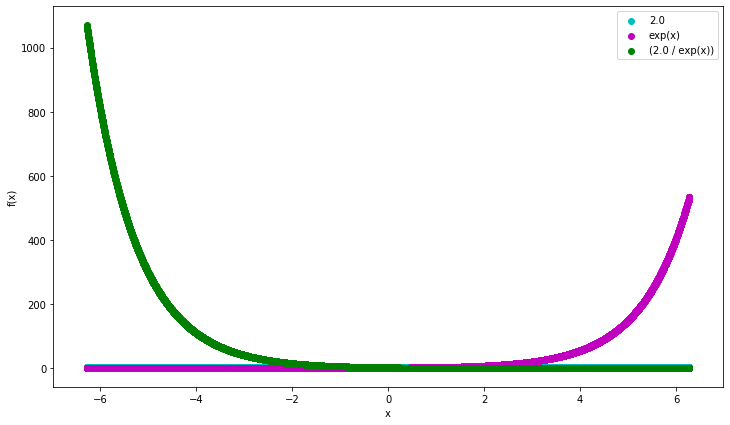

In [20]:
# The result is
fd1 = SD1.get_field()
fd2 = SD2.get_field()
fd3 = SD3.get_field()

fig,axs = plt.subplots(figsize=(12,7))
axs.scatter(x,fd1,color='c',label=SD1.get_name())
axs.scatter(x,fd2,color='m',label=SD2.get_name())
axs.scatter(x,fd3,color='g',label=SD3.get_name())
axs.set_xlabel('x')
axs.set_ylabel('f(x)')
plt.legend()
plt.show()

## Calculus over scalar fields